Bayesian posterior inference: Explain Bayes’ Rule. Write some code to actually perform posterior sampling. Work out an example using conjugate priors. How does this compare with hypothesis testing? What are the underlying assumptions?

### In many real world applications, we don't know the probability of events, but we would like to estimate this unknown probability based on our hypothesis and collected evidence. Seems rational, right? 

#### This is the basis for Bayes' Rule, where we:
1. Identify possible models and construct prior probabilities (based on our knowledge or beliefs)
2. Collect data and create liklihoods, or the chance of getting this data given each model 
3. Use Bayes' rule to find posterior probabilities and update our knowledge so we can determine which model is likely to be correct


In [ ]:
The basic conditional probability equation is:

$P(A|B) = \frac{P(A\cap B)}{P(B)}$

The probability of A ${given}$ B is equal to the probability of both A and B occuring, normalized by the probability of B occuring. This is often written as:

In [ ]:
$P(A|B) = \frac{P(B|A) P(A)}{P(B)}$

Here we would say the Posterior probability P(A|B) is equal to the Likelihood P(B|A) multiplied by the Prior P(A) normalized by the probability of data P(B).

#### Let's work through an example and describe some of the particulars as we go.
Say you're the city manager of Austin planning a free concert. Woah big city! And a heck of a music scene! This seems like a big task, and you want to know about how many people will come so you can plan ahead and order the right amount of food. You don't need an exact headcount because ordering is done in bulk. So you would like to know the approximate proportion of the city that will show up in 10% groups (10%, 20%, 30%, etc). Because you've been the city manager for a few years, you have some prior knowledge of these concerts and believe at least 20% of the town will show up, but not more than 90%. You also believe the 60% and 70% groups are 2X as likely as the others. What is the estimated proportion of the city that will show up? 

You're pretty savvy, and send out an email asking if people will attend the concert. You send it out to 150 people and 70 respond 'yes' and 80 respond 'no'. You know this proportion of attendance (70/150 = 0.46) is not the real estimate because surveys are not always accurate and people do change their minds. So, you want to employ some statistics to help you estimate the most likely proportion of people that will come.

Let's define this problem in Bayes terms.

#### 1. Identify possible models and construct prior probabilities

The models are the proportion of the town that will show up. We want to estimate the probability that each 'model' is true so we can determine the most likely scenario. The models are: p=0.3, p=0.4, p=0.5, p=0.6, p=0.6, p=0.8 and p=0.9
Prior probabilities are based on what we know about concert attendance. In this case, we have 7 models (p=0.3 ... p=0.9), if the probability of each model being true were equal the 'prior probabilities' would = 1/7. However, we know that p=0.6 is 2X as likely. The sum of prior probabilities must sum to 1. Therefore the model and priors are:


In [1]:
options(repos = c('https://cloud.r-project.org/'))
install.packages(c("ggplot2", "dplyr", "sciplot", "reshape", "TeachBayes"))

Models=c(0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9)
Priors=round(c(1/8, 1/8, 1/8, 2/8, 1/8, 1/8, 1/8),2)

df=data.frame(Models, Priors)
rownames(df)=c("p=0.3", "p=0.4", "p=0.5", "p=0.6", "p=0.7", "p=0.8", "p=0.9")
df

Installing packages into 'C:/Users/nrb75/Documents/R/win-library/3.4'
(as 'lib' is unspecified)


package 'ggplot2' successfully unpacked and MD5 sums checked
package 'dplyr' successfully unpacked and MD5 sums checked
package 'sciplot' successfully unpacked and MD5 sums checked
package 'reshape' successfully unpacked and MD5 sums checked
package 'TeachBayes' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\nrb75\AppData\Local\Temp\RtmpCMHkN3\downloaded_packages


,Models,Priors
p=0.3,0.3,0.12
p=0.4,0.4,0.12
p=0.5,0.5,0.12
p=0.6,0.6,0.25
p=0.7,0.7,0.12
p=0.8,0.8,0.12
p=0.9,0.9,0.12


#### 2. Collect Data and create liklihoods

A liklihood is the probability of observing your result ${given}$ the model is true. In this scenario, the observed result is that from the survey. This is a binomial function where Success is defined as 'yes' I will attend the concert. Success=70, size = 150, and binomial probability of succes = models. Now we simply calculate the liklihood of observing the survey results, ${given}$ the model is true.

For example, the liklihood that p=0.3:

In [122]:
dbinom(70, size=150, prob=0.3)

[1] 6.762257e-06

This is a very low value! and it suggests the liklihood of observing this survey result, ${given}$ the actual probability of attendance is 0.3 is very low.

Calculating the liklihood for the remaining models given the survey data is true:

In [2]:
df$Liklihood=dbinom(70, size=150, prob=Models)
df


,Models,Priors,Liklihood
p=0.3,0.3,0.12,6.762257e-06
p=0.4,0.4,0.12,1.659816e-02
p=0.5,0.5,0.12,4.669402e-02
p=0.6,0.6,0.25,2.878376e-04
p=0.7,0.7,0.12,1.413591e-09
p=0.8,0.8,0.12,1.325743e-19
p=0.9,0.9,0.12,4.175768e-40


#### 3. Now we want to update our prior probabilities with a posterior probability, which depends on our priors and the observed data.

$Posterior\ probability =\frac{Prior\ x\ Liklihood} {\sum(Prior\ x\ Liklihood)}$


In [3]:
df$Product = df$Priors*df$Liklihood
df$Posterior=df$Product/sum(df$Product)
df

,Models,Priors,Liklihood,Product,Posterior
p=0.3,0.3,0.12,6.762257e-06,8.114709e-07,1.058279e-04
p=0.4,0.4,0.12,1.659816e-02,1.991780e-03,2.597578e-01
p=0.5,0.5,0.12,4.669402e-02,5.603283e-03,7.307517e-01
p=0.6,0.6,0.25,2.878376e-04,7.195939e-05,9.384579e-03
p=0.7,0.7,0.12,1.413591e-09,1.696309e-10,2.212241e-08
p=0.8,0.8,0.12,1.325743e-19,1.590892e-20,2.074760e-18
p=0.9,0.9,0.12,4.175768e-40,5.010921e-41,6.534989e-39


A good check is that the sum of the Posterior probabilities = 1.

In [4]:
sum(df$Posterior)

[1] 1

Good, the Posterior probabilities sum to 1. Now how are these Posterior Probabilities different than our Priors?

Warning message:
"package 'ggplot2' was built under R version 3.4.4"

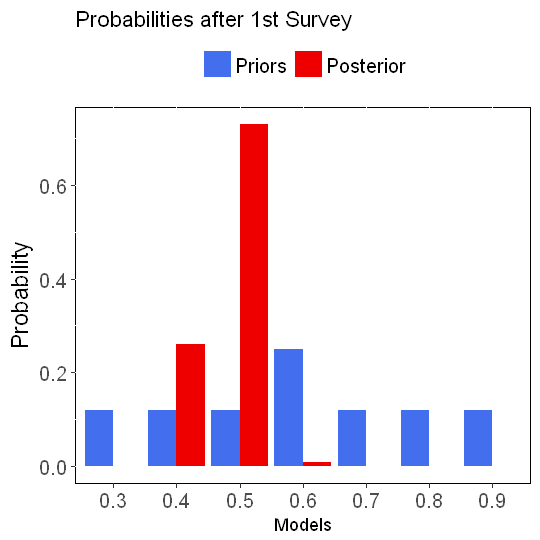

In [8]:
options(repr.plot.width=4.5, repr.plot.height=4.5)
library(reshape)
library(ggplot2)

df.long=melt(df, id="Models")

plt.std=plt.std=theme(legend.position="top", legend.text = element_text(size=12), axis.text.x = element_text(size=12),  axis.text.y = element_text(size=12), axis.title.y = element_text(size=14), strip.text.x = element_text(size=16), panel.background = element_rect(fill='white', colour='black'), legend.key = element_blank())
color1=c("royalblue2", "red2")
ggplot(data=subset(df.long, variable%in% c("Priors", "Posterior")), aes(x=as.factor(Models), y=value, fill=variable))+geom_bar(stat="identity", position="dodge")+ylab("Probability")+scale_fill_manual(values=color1, name="")+xlab("Models")+ggtitle("Probabilities after 1st Survey")+plt.std

Origninally, the prior probabilities are more equally distributed across our models. But, with our beliefs and the survey data we see that it is far more likely the survey results came from a model where the proportion of town attandance is 0.5. 

This updates our probabilities and we would suggest the town manager order enough food for roughly 50% of Austin. $\textbf{Now she is more confident that the attendance will be near 50%, when earlier she thought it was more likely that the attendance could be 60%.}$ She is now able to save money and not waste food. What a good reason to employ Bayes' Theorem!

We're happy with these results, but suppose we wanted to send another survey closer to the concert date to give us a better estimate of the attendance. We would simply take the "Posteriors" from the results above and use them as our "Priors" in the calculations. 

In [9]:
df2=df[c("Models", "Posterior")]
colnames(df2)[2]="Priors2"
df2

,Models,Priors2
p=0.3,0.3,1.058279e-04
p=0.4,0.4,2.597578e-01
p=0.5,0.5,7.307517e-01
p=0.6,0.6,9.384579e-03
p=0.7,0.7,2.212241e-08
p=0.8,0.8,2.074760e-18
p=0.9,0.9,6.534989e-39


We calculate the Liklihoods next based on the new survey results.
Our new survey was sent to 100 people and 55 responded 'yes'. We calculate a new Liklihood for each model:

In [10]:
df2$Liklihood2=dbinom(65, size=100, prob=Models)
df2

,Models,Priors2,Liklihood2
p=0.3,0.3,1.058279e-04,4.273205e-13
p=0.4,0.4,2.597578e-01,2.562323e-07
p=0.5,0.5,7.307517e-01,8.638557e-04
p=0.6,0.6,9.384579e-03,4.913282e-02
p=0.7,0.7,2.212241e-08,4.677968e-02
p=0.8,0.8,2.074760e-18,1.889469e-04
p=0.9,0.9,6.534989e-39,1.161994e-11


In [ ]:
Now we recalculate the product and Posterior proabilities:

In [11]:
df2$Product2 = df2$Priors*df2$Liklihood2
df2$Posterior2=df2$Product2/sum(df2$Product2)
df2

,Models,Priors2,Liklihood2,Product2,Posterior2
p=0.3,0.3,1.058279e-04,4.273205e-13,4.522244e-17,4.139647e-14
p=0.4,0.4,2.597578e-01,2.562323e-07,6.655836e-08,6.092730e-05
p=0.5,0.5,7.307517e-01,8.638557e-04,6.312640e-04,5.778570e-01
p=0.6,0.6,9.384579e-03,4.913282e-02,4.610909e-04,4.220811e-01
p=0.7,0.7,2.212241e-08,4.677968e-02,1.034879e-09,9.473250e-07
p=0.8,0.8,2.074760e-18,1.889469e-04,3.920195e-22,3.588534e-19
p=0.9,0.9,6.534989e-39,1.161994e-11,7.593618e-50,6.951173e-47


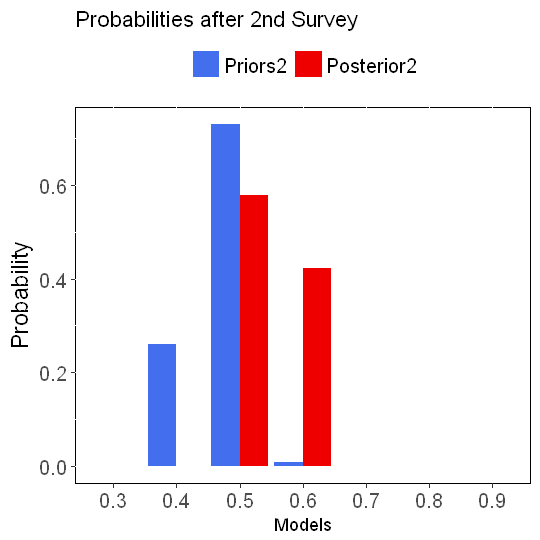

In [12]:
df.long2=melt(df2, id="Models")

ggplot(data=subset(df.long2, variable%in% c("Priors2", "Posterior2")), aes(x=as.factor(Models), y=value, fill=variable))+geom_bar(stat="identity", position="dodge")+plt.std+ylab("Probability")+scale_fill_manual(values=color1, name="")+xlab("Models")+ggtitle("Probabilities after 2nd Survey")

Now, after the 2nd survey we are still confident the proprotion of Austin attending the concert will be 50%, but there is also a roughly 42% chance that p=0.6. If we repeated this again and again and survey results came from a known distribution, we would converge on the true probabilities for each model.

We'd like to be a bit more confident before placing our food order. But, we don't have time for more surveys. We have some statistic nerds in the city planning group, and they suggest running simulations to approximate survey results and update our Posterior probabilities.


Using the same general idea as above, we'll construct our Posterior distribution based on the Prior distribution. If these two distributions are in the same family they are called $conjugates$. 

For the binomial distribution (our survey successes or failures), the conjugate is a beta distribution. Thus, when we know the Prior distribution we can determine the Posterior distribution, which is proportional to the Likelihood x Prior distribution. This helps simplify our ability to calculate the Posterior. 

$Posterior = \frac{(Likelihood) * Prior}{Data}$ 

$P(A|B) = \frac{P(B|A) P(A)}{P(B)}$ 

Because the denominator is a normalizing term (makes the probabilities sum to 1), we know that Posterior is proportional to Likelihood and Prior.  Think of this like chemistry with conjugate acids and bases. If we know 1, we can determine the other one we need to nuetralize our chemicals. .


In this binomial example:

$Posterior Binomial = {(Binomial  Likelihood) * Beta Prior}$

We won't get into all the details of a Beta distribution, but think of it like a normal distribution and instead of being characterizied by the mean and standard deviation, it is paramaterized by two shape terms a and b.

Now, instead of using survey results we are going to use our knowledge to create a Prior distribution where we believe the true town attendance is approximated by a Beta curve with shape parameters a= and b=



In [ ]:
abprior=

In [ ]:
#rnorm(n=100, mean=0.6, sd=0.2)

## Markov Chain Monte Carlo
To better approximate our Posterior distribution with simulated surveys, we will use a Markov Chain Monte Carlo simulation, or MCMC for short. We won't get into all the details here, but the main goal of a MCMC is to simulate the Posterior distribution instead of solving for it analytically (which can be very difficult).

This basically simulates random draws from a target distribution (Posterior distribution), and then the frequency of these draws is summarized as the probability of each model being true.

#### A Markov Chain creates a sequence of numbers, where each value depends only on the value prior and does not have a 'memory'.

#### A Monte Carlo simulation generates random numbers from some distribution, and if we repeat this enough, the estimate will converge on the actual value.

If we put these two things together, we are creating random draws of Markov Chains. These chains (or vectors of values) represent the Posterior distribution. Since we have many many Markov Chains (thanks to Monte Carlo simulations) the simulated Posterior distribution approaches the true distribution, and we are able to calculate the probabilities of each 'model' being true given the data.


In this example, we are trying to calculate the true proportion of people in Austin that will attend this concert. The stats nerds have looked at previous attendance records, they determine:

1. Prior attendance median value of 0.60
2. The Attendance proportion follows a beta distribution with a=2.9 and b=2.0



Metropolis-Hastings

This algorithm uses a candidate or proposal distribution, say q(·, ν), where ν is/are parameters that is/are fixed by the user - called tuning parameters. As we outline in
the next page, the MH algorithm constructs a Markov Chain by proposing a value for θ from this candidate distribution, and then either accepting or rejecting this value (with a certain probability). Theoretically the proposal distribution can be any distribution, but in practice you choose something really simple: a Normal distribution if your parameter
can be any real number.

Assume x(t) follows normal distribution with mean=0.6 and sd=.2

https://link.springer.com/content/pdf/10.1007%2F978-1-4419-1576-4_6.pdf


[1] 0.88204107 0.27427684 0.88015502 0.58623913 0.74711684 0.53573204
  [7] 0.29556830 0.44892827 0.35497587 0.58316425 0.87535325 0.53157141
 [13] 0.65314065 0.76996773 0.49639950 0.70251527 0.90728514 0.86400039
 [19] 0.85835462 0.69295263 0.32108568 0.26276873 0.24010020 0.66971410
 [25] 0.07722013 0.18449398 0.50861645 0.35694574 0.52191047 0.64751635
 [31] 0.80374571 1.01764335 0.34341112 0.41466855 0.76533531 0.79108859
 [37] 0.50947460 0.61278157 0.46002494 0.51470481 0.64037042 0.62383172
 [43] 0.44938617 0.65385032 0.14339395 0.53830501 0.56336837 0.18321643
 [49] 0.67363435 0.85723179 0.88654827 0.73634236 0.83885438 0.73457616
 [55] 0.43170749 0.37530498 0.77803019 0.65699013 0.67924151 0.68736991
 [61] 0.36618071 0.49925581 0.89870167 0.68629245 0.79208854 0.70524455
 [67] 0.37156955 1.03807647 0.34562825 0.82355567 0.83752103 0.66032064
 [73] 0.31882736 1.17872308 0.84275734 0.76150424 0.90074400 0.71904579
 [79] 0.49195833 0.43470020 0.65596485 0.61811089 0.62808291 0.50612083
 [85] 0.57029584 0.75887452 0.38603879 0.41065484 0.62113555 0.61685194
 [91] 0.66193597 0.73139521 0.61456345 0.48989939 0.53242591 0.33269199
 [97] 0.35489619 0.79337074 0.61895273 0.72384363

In [130]:
library(dplyr)
library(TeachBayes)
beta_draw(c(2.9,2))

Warning message:
"package 'dplyr' was built under R version 3.4.4"

ERROR: Error: package or namespace load failed for 'dplyr' in loadNamespace(j <- i[[1L]], c(lib.loc, .libPaths()), versionCheck = vI[[j]]):
 namespace 'R6' 2.2.1 is being loaded, but >= 2.2.2 is required


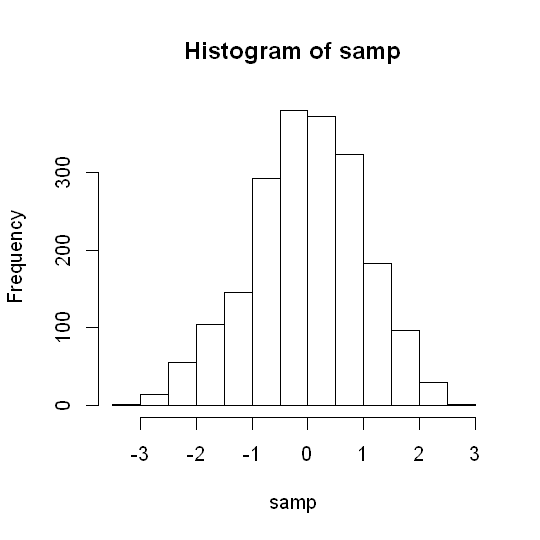

In [115]:
tuneSD=1.5

M=2000
samp=1:M
counter=0

#starting value
samp[1]=1.2

for (m in 2:M)
{
samp[m]=samp[m-1] #default if not changed below
candidate=rnorm(1,samp[m-1],tuneSD) #note symmetry
ll.cur=dnorm(samp[m-1],0,1,log=T)
ll.cand=dnorm(candidate,0,1,log=T)
prob=min(exp(ll.cand-ll.cur),1)
coin=rbinom(1,1,prob)
if (coin)
{
samp[m]=candidate
counter=counter+1
}
}

accept.rate=sum(counter)/M
hist(samp)

In [109]:
rbinom(n=10, size=100,prob=0.5) 
#n = number of draws, size = sample size of population, prob = probability of success (or attendance in this case)

[1] 53 61 55 46 44 50 59 46 44 50

In [ ]:
#### A Monte Carlo simulation generates random numbers from some distribution, and if we repeat this enough, the estimate will converge on the actual value.

Why do we need the Priors are all, you may ask? Well, they help constrain our estimates. If we had no Priors, the Likelihood of observing each model ${given}$ the survey results, would be based soley on the survey results (yes and no responses for a binomial) and give no weight to the fact that usually 60% and 70% of the population attends a concert. Without these priors our estimated proportion of the town in attendance would be:

The Monte Carlo methods are simulations instead of analytical solutions. In frequentist (or the more traditional) statistics, you would use a function to maximize a likelihood. Here we simulate results and determine which results would occur in greatest frequency.

A lot of times we have some knowledge or beliefs about something, and then we collect evidence and update our beliefs. This is the basic scientific method, and also sums up Baye's theory.

Instead of knowing absolute probabilities of an event, we use the information we have at hand and our prior belief of the situation to update our belief (now called a posterior).

Let's explore how Bayes makes use of these prior beliefs to help us better estimate things are are interested in.

For example, we want to know the average height of women in the U.S. We have know prior knowledge in the area, so we assume that heights can be any positive value. We sample 10 women and the mean and standard devations of heights (in decimal feet 5.5 = 5'6") are:


In [4]:
options(repos = c('https://cloud.r-project.org/'))
install.packages(c("ggplot2", "dplyr", "sciplot", "repr", "VennDiagram"))

heights=c(5,5.2,5.7,5.2,5.8,5.10,5.1,5.3,6.,5.5) #heights in ft decimal feet 5'6" = 5.5 ft
mean.height=mean(heights)
sd.height=sd(heights)

mean.height
round(sd.height,2)

package 'ggplot2' successfully unpacked and MD5 sums checked
package 'dplyr' successfully unpacked and MD5 sums checked
package 'sciplot' successfully unpacked and MD5 sums checked
package 'repr' successfully unpacked and MD5 sums checked
package 'VennDiagram' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\nrb75\AppData\Local\Temp\RtmpSmnMwB\downloaded_packages


[1] 5.39

[1] 0.3414023

Now, whats the probabiity of a certain height given these measurements? We can create a distribution for these heights


For example, we believe that the average height of women is 5'5" and that these heights are normally distributed. We collect some data from 10 women, and are now going to check our prior hypothesis and update it to a posterior estimate. We do this by creating a posterior distribution based on our belief the average is 5'5" and liklihood of that being true based on our collected data.

The measured mean height =

the measured standard deviation of height =